In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import logging
from funs import *

log("START",level = ("start","Local_Outlier_Factor"))

Local_Outlier_Factor



<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Impot danych z wcześniejszego parsowania w Anomaly_detect_ML</div>
</div>

In [2]:
df_1_scaled = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_1_scaled')
df_scaled = pd.read_hdf('parsed_data/merged_CICIDS2017.h5', key='df_scaled')
df_labels = pd.read_hdf('parsed_data/merged_CICIDS2017.h5', key='df_labels')
df_scaled_result_check_test = pd.read_hdf('parsed_data/IF_segmented_CICIDS2017.h5', key='df_2_scaled_result_check')

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Treming modelu</div>
</div>

In [ ]:
LOF= LocalOutlierFactor(
    n_neighbors=50,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=True,
    n_jobs=None
)
LOF.fit(df_1_scaled)

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Test modelu</div>
</div>

/root/Anomaly_Detection/venv_AD/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/root/Anomaly_Detection/venv_AD/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Local_Outlier_Factor
Detection distribution anomaly/normal: 35.6408% / 64.3592%
!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected: 597693
Normal traffic: 1079300


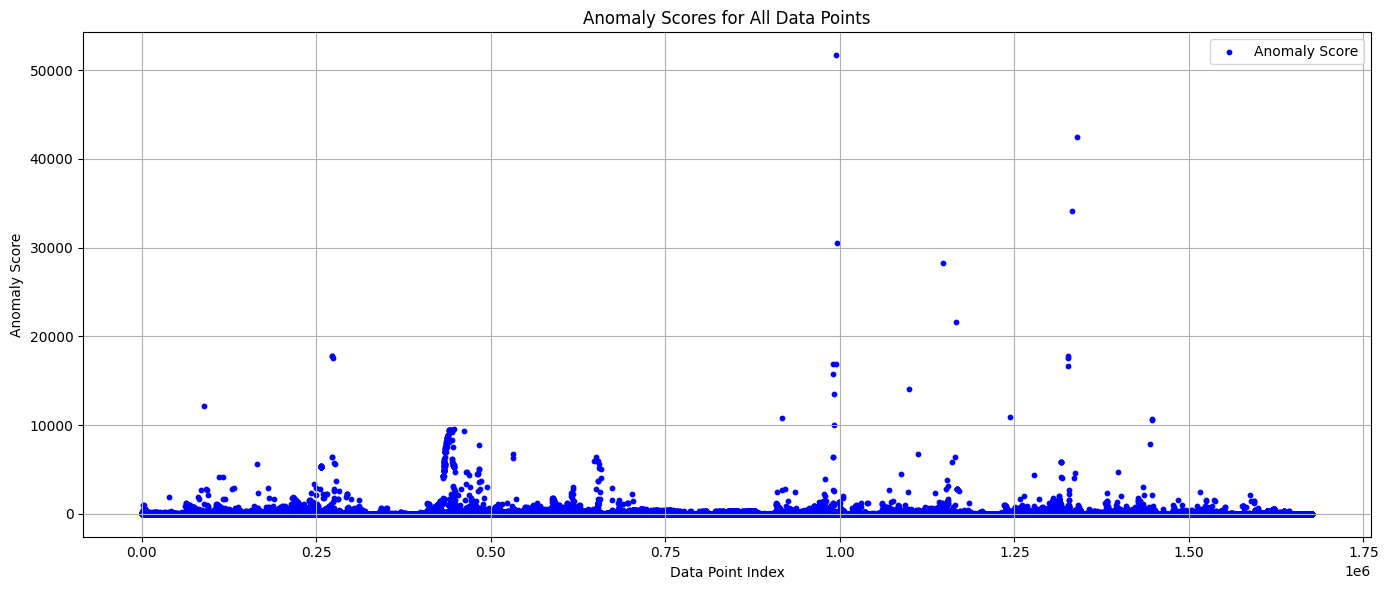

Local_Outlier_Factor
Number of flows in df_test: 1676993
Correct data: 
Real number of anomalies in df_test: 335370
Procentage of anomlys in dataset: 19.9983%
Predicted data: 
Number of DETECTED anomalies in df_test: 597693
Procentage of anomlys in dataset: 35.6408%

Number of correct predictions(TP): 298169
Number of wrong predyctions(FP): 299524
Accuracy of predictions: 79.9209%
Sensitivity of predictions: 88.9075%
Precision of predictions: 49.8866%
F - mesure - harmonic-mean of precision and sensitivity: 63.9119%


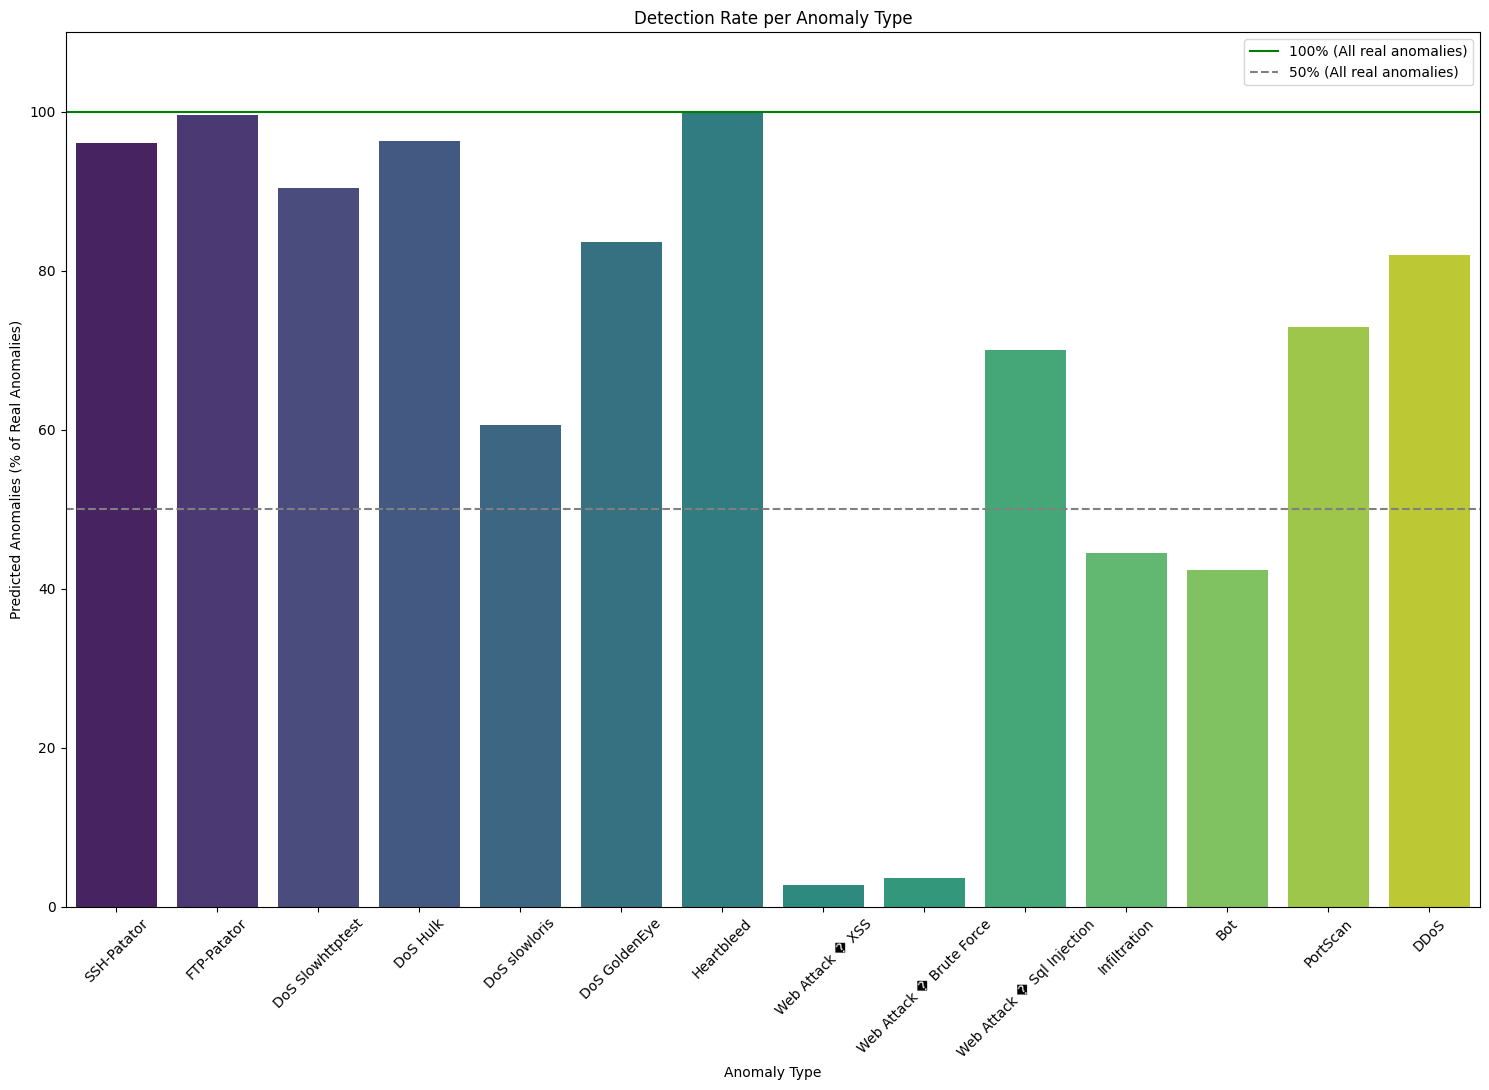

Detection rate by attack type:
Name: SSH-Patator, Detected: 96.0355%
Name: FTP-Patator, Detected: 99.5953%
Name: DoS Slowhttptest, Detected: 90.4343%
Name: DoS Hulk, Detected: 96.278%
Name: DoS slowloris, Detected: 60.5537%
Name: DoS GoldenEye, Detected: 83.5716%
Name: Heartbleed, Detected: 100.0%
Name: Web Attack � XSS, Detected: 2.7607%
Name: Web Attack � Brute Force, Detected: 3.5739%
Name: Web Attack � Sql Injection, Detected: 70.0%
Name: Infiltration, Detected: 44.4444%
Name: Bot, Detected: 42.3336%
Name: PortScan, Detected: 72.9589%
Name: DDoS, Detected: 82.0237%


In [6]:
df_scaled_result_check = test_LOF_model(LOF,df_scaled,df_labels, name="df_test")

In [ ]:
OCSVM = OneClassSVM(
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=1e-3,
    nu=0.5,
    shrinking=True,
    cache_size=200,
    verbose=True,
    max_iter=-1
)

OCSVM.fit(df_1_scaled)

[LibSVM]

In [ ]:
test_OCSVM_model(OCSVM, df_scaled, df_labels, name="df_test")